<a href="https://colab.research.google.com/github/midhun9633/ML-Projects/blob/main/insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/insurance.csv')
df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [94]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [95]:
df.tail(3)

,age,sex,bmi,children,smoker,region,expenses
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [96]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [97]:
df.shape

(1338, 7)

In [98]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [99]:
#About this Dataset
#The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).
#The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 categorical features (sex, smoker and region)


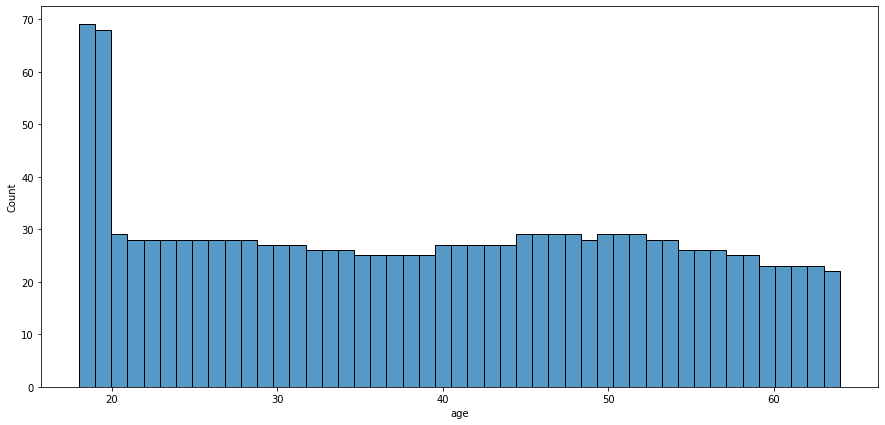

In [100]:
# Visualize age column
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='age',bins=47)

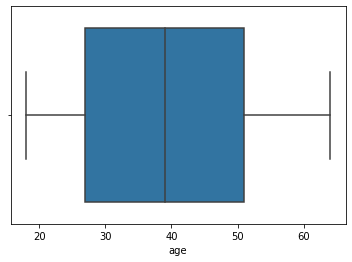

In [101]:
#visualize age with a box plot
sns.boxplot(x=df.age)

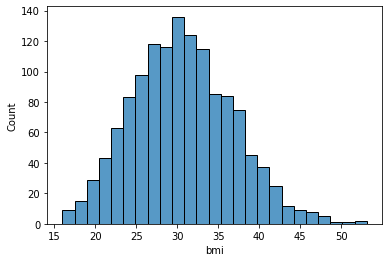

In [102]:
sns.histplot(data=df,x='bmi')

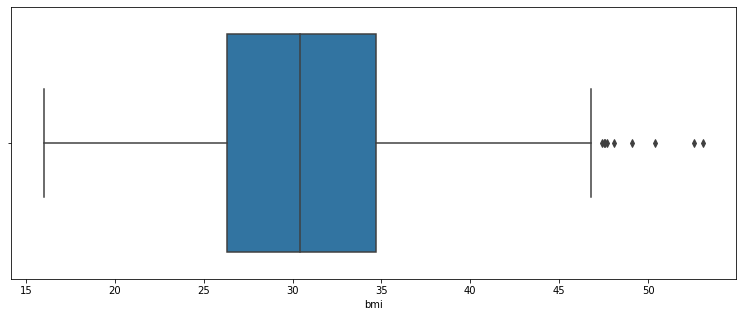

In [103]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df.bmi)


In [104]:
#boxplot shows there are some outliers

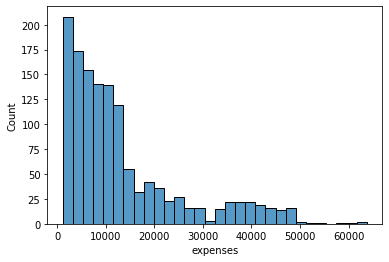

In [105]:
sns.histplot(data=df,x='expenses')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


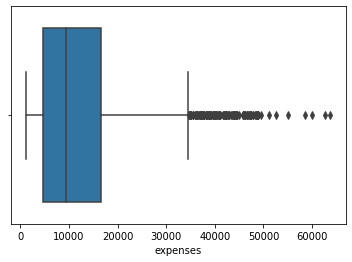

In [106]:
sns.boxplot(df.expenses)

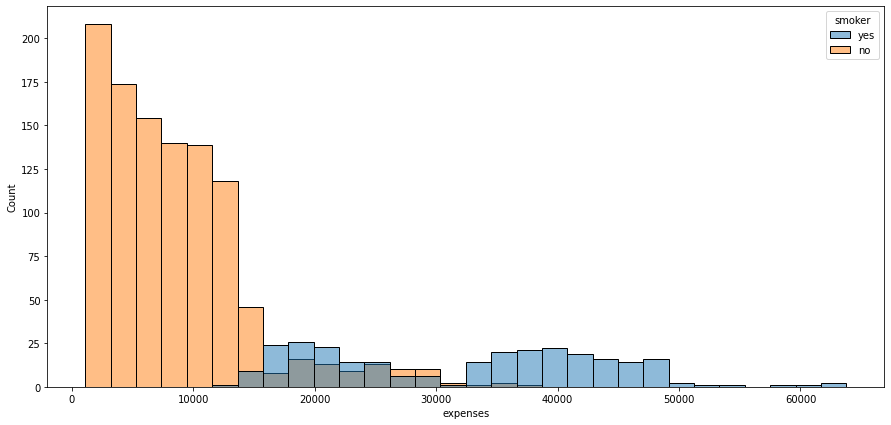

In [107]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='expenses',hue='smoker')

In [108]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

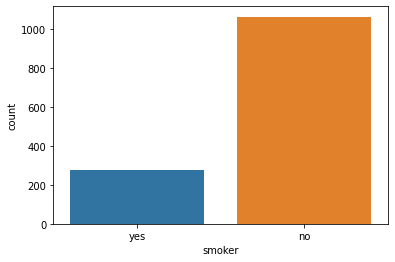

In [109]:
sns.countplot(x=df.smoker)

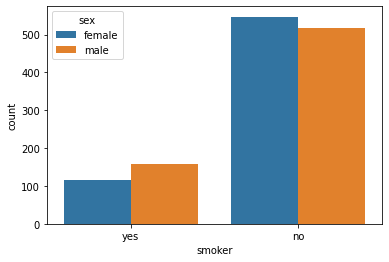

In [110]:
sns.countplot(x=df.smoker, hue=df.sex)

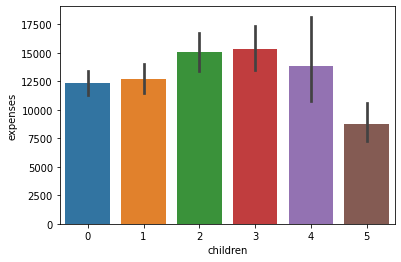

In [111]:
sns.barplot(x=df.children,y=df.expenses)

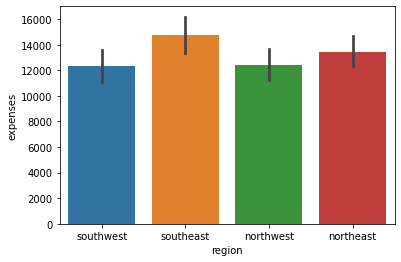

In [112]:
sns.barplot(x=df.region,y=df.expenses)

In [113]:
# People with 5 children have the lowest expenses.
# People in the southeast region have highest expenses, and people in northwest have lowest.

In [114]:
x=df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [115]:
y=df.iloc[:,-1]
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [116]:
# Create dummy variables for categorical features.
smoker = pd.get_dummies(x['smoker'], drop_first=True)
region = pd.get_dummies(x['region'], drop_first=True)
sex = pd.get_dummies(x['sex'], drop_first=True )

In [117]:
x=x.drop(columns=['sex'])
x=x.drop(columns=['region'])
x=x.drop(columns=['smoker'])



In [118]:
x=pd.concat([x,sex],axis=1)
x=pd.concat([x,region],axis=1)
x=pd.concat([x,smoker],axis=1)

In [119]:
x

,age,bmi,children,male,northwest,southeast,southwest,yes
0,19,27.9,0,0,0,0,1,1
1,18,33.8,1,1,0,1,0,0
2,28,33.0,3,1,0,1,0,0
3,33,22.7,0,1,1,0,0,0
4,32,28.9,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,1,1,0,0,0
1334,18,31.9,0,0,0,0,0,0
1335,18,36.9,0,0,0,1,0,0
1336,21,25.8,0,0,0,0,1,0


In [120]:
#the smoker column got renamed to yes now we have to again rename that yes to smoker

x.rename(columns={'yes':'smoker'},inplace=True)

In [121]:
x.dtypes

age            int64
bmi          float64
children       int64
male           uint8
northwest      uint8
southeast      uint8
southwest      uint8
smoker         uint8
dtype: object

In [122]:
# Split data into Training and Test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)

In [123]:
# Fit Model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [124]:
y_pred = regressor.predict(x_test)
y_pred

array([ 4374.61636154, 12871.39737702, 12589.74779507, 13275.55857668,
         544.4221504 , 32120.47658243, 12914.9839414 , 12318.60789803,
        3773.56268735, 29465.87792401, 10990.43439981, 17541.17145132,
        8667.32244953,  8348.83765071,  3119.97162802, 10445.7795565 ,
        3860.98051055,  6944.52710136, 15001.84330361, 14441.32659035,
       12558.84873498, 32973.90456264,  9058.72550119,  8986.27766364,
        3017.49895182,  8162.67648528,  9567.7436898 , 10732.07744082,
        7694.49654218,  4385.09492   , 14141.13277663,  5811.71665082,
       34625.99628075, 27002.25504885, 33361.44000112,  9525.06917814,
       30421.89097821, 26648.48137145, 15172.77763607, 33896.07852747,
        6302.44084901, 14061.88371626, 10701.79020011, 15089.74920497,
        4187.46476068, 13106.43974198,  4332.56233818, 28611.82776636,
        7257.43594517, 14272.82317569, 13290.15974824, 12329.20746196,
        1865.51822648,  8875.72415273, 26100.76455566, 10119.49218526,
      

In [125]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.762340085900854

In [126]:
# We have a R^2 score of 0.76 which tells us that our model is accurate.